In [1]:
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def read_mta(file_nums):
    path ='http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    allFiles = []
    for i in file_nums:
        allFiles.append(path + i + ".txt")
    df_list = [pd.read_csv(file) for file in allFiles]
    df = pd.concat(df_list)
    df.columns = df.columns.str.strip()
    return df

In [31]:
from sqlalchemy import  *
engine=create_engine('sqlite:///MTA_EDA.db')
df.to_sql('MTAEDA',engine,if_exists='replace', index=False)

In [33]:
all_tables = engine.table_names()
print(all_tables)

['MTAEDA']


<ipython-input-33-4734826e1833>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


In [32]:
df= pd.read_sql('select * from MTAEDA ;', engine)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689
...,...,...,...,...,...,...,...,...,...,...,...
2334613,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544
2334614,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544
2334615,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544
2334616,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544


In [3]:
# first 3 months data in 2021
df = read_mta(['210102', '210109', '210116', '210123', '210206', '210213', 
               '210220', '210227', '210306', '210313', '210320', '210327'])

In [4]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [5]:
# remove duplicates
df = df[df.DESC != 'RECOVR AUD']
df = df[df.TIME != '04:00:00']
# Sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2021,03:00:00,1
1556414,R138,R293,00-00-03,34 ST-PENN STA,01/17/2021,05:00:00,1
1556408,R138,R293,00-00-03,34 ST-PENN STA,01/16/2021,05:00:00,1
1556409,R138,R293,00-00-03,34 ST-PENN STA,01/16/2021,09:00:00,1
1556410,R138,R293,00-00-03,34 ST-PENN STA,01/16/2021,13:00:00,1


In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689


In [7]:
df['DATETIME'] = pd.to_datetime(df.DATE + ' ' + df.TIME)

In [8]:
df = df.set_index(['DATETIME'])

In [9]:
# filter dataset in all day
daily = df.between_time('00:00:00', '23:59:00')
daily.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
DATETIME,,,,,,,,,,,
2021-03-26 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544
2021-03-26 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544
2021-03-26 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544
2021-03-26 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544
2021-03-26 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,21:00:00,REGULAR,5554,544


In [10]:
# subtract max from min for each turnstile to get entries
daily_turn = (daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['ENTRIES'].max()\
           -daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['ENTRIES'].min()).reset_index()

In [11]:
#explore outliers
daily_turn['ENTRIES'].describe()

count    4.187060e+05
mean     1.621284e+04
std      4.177902e+06
min      0.000000e+00
25%      4.500000e+01
50%      1.710000e+02
75%      3.660000e+02
max      1.821543e+09
Name: ENTRIES, dtype: float64

In [12]:
daily_turn['ENTRIES'].sort_values(ascending = True).tail(30)

313090       4001977
390219       4266895
137758       4343741
276299       5344925
405          6641459
276480       6920613
276648       7456747
276215       7780797
288012       9202075
157300      10195975
81447       10417035
115481      11567675
402478      11667694
404523      11839138
269852      11883600
118934      13807646
288040      15440263
64463       16672417
81450       16712696
133773      67108864
217669      67355644
98775       67961010
17249      185259231
207668     239666909
64547      451264604
216125     537005898
351692     685197215
349295     842168320
352310    1487331332
350051    1821543301
Name: ENTRIES, dtype: int64

In [13]:
# removing values that appear to be counter resets
daily_turn = daily_turn[daily_turn.ENTRIES <= 11000]

In [14]:
# add up total daily entries per station
daily_station = daily_turn.groupby(['STATION', 'DATE']).sum().reset_index()
daily_station['DATE'] = pd.to_datetime(daily_station['DATE'])
daily_station.tail()

,STATION,DATE,ENTRIES
31726,ZEREGA AV,2020-12-27,342
31727,ZEREGA AV,2020-12-28,841
31728,ZEREGA AV,2020-12-29,871
31729,ZEREGA AV,2020-12-30,783
31730,ZEREGA AV,2020-12-31,660


In [15]:
# summing for whole month
daily_month = daily_station.groupby(['STATION'])['ENTRIES'].sum().reset_index()
daily_month = daily_month.set_index('STATION')

<AxesSubplot:title={'center':'Entries by Station'}, ylabel='STATION'>

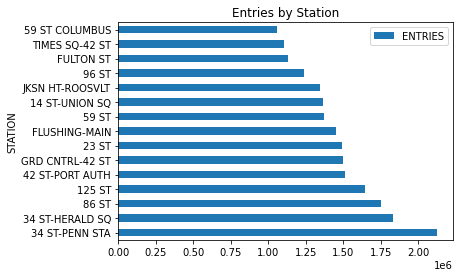

In [16]:
# determine busiest stations

topsts = daily_month.sort_values('ENTRIES', ascending=False).head(15)
topsts.head()
topsts.plot(kind='barh', title='Entries by Station')

In [17]:
# limit to 34 ST-PENN STA at turnstile level
penn = df[df['STATION'] == '34 ST-PENN STA']

In [18]:
#show the numbers of raws & columns
penn.shape

(50112, 11)

In [19]:
penn.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
DATETIME,,,,,,,,,,,
2021-03-26 06:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,06:00:00,REGULAR,68066172,18746855
2021-03-26 10:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,10:00:00,REGULAR,68066183,18746914
2021-03-26 14:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,14:00:00,REGULAR,68066227,18746975
2021-03-26 18:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,18:00:00,REGULAR,68066258,18747033
2021-03-26 22:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,22:00:00,REGULAR,68066287,18747065


In [20]:
turnstiles = penn['SCP'].unique()

In [21]:
masked_dfs = []
for i in turnstiles:
    mask = penn[((penn["C/A"] == "R142") &
    (penn["UNIT"] == "R293") &
    (penn["SCP"] ==  i) &
    (penn["STATION"] == "34 ST-PENN STA"))]
           
    mask['DIFFS'] = mask['ENTRIES'].diff()
    masked_dfs.append(mask)

<ipython-input-21-9653e71235f8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['DIFFS'] = mask['ENTRIES'].diff()


In [22]:
entries_turn = pd.concat(masked_dfs)

In [23]:
entries_turn.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DIFFS
DATETIME,,,,,,,,,,,,
2021-03-26 06:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,06:00:00,REGULAR,68066172,18746855,1.0
2021-03-26 10:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,10:00:00,REGULAR,68066183,18746914,11.0
2021-03-26 14:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,14:00:00,REGULAR,68066227,18746975,44.0
2021-03-26 18:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,18:00:00,REGULAR,68066258,18747033,31.0
2021-03-26 22:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,22:00:00,REGULAR,68066287,18747065,29.0


In [24]:
#remove NaN values and negative values (i.e. counter resets)
entries_turn.dropna(inplace=True)
entries_turn = entries_turn[entries_turn['DIFFS'] >= 0]

In [25]:
# now have turnstile entries per four period (diffs column)
entries_turn.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DIFFS
DATETIME,,,,,,,,,,,,
2021-03-26 06:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,06:00:00,REGULAR,68066172,18746855,1.0
2021-03-26 10:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,10:00:00,REGULAR,68066183,18746914,11.0
2021-03-26 14:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,14:00:00,REGULAR,68066227,18746975,44.0
2021-03-26 18:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,18:00:00,REGULAR,68066258,18747033,31.0
2021-03-26 22:00:00,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,03/26/2021,22:00:00,REGULAR,68066287,18747065,29.0


In [26]:
# add entries across turnstiles by time
entries_turn = entries_turn.reset_index()
ct = entries_turn.groupby(['DATETIME'])['DIFFS'].sum().reset_index()

In [27]:
ct.set_index(['DATETIME'], inplace=True)
ct.tail()

,DIFFS
DATETIME,
2021-03-26 06:00:00,8.0
2021-03-26 10:00:00,150.0
2021-03-26 14:00:00,402.0
2021-03-26 18:00:00,661.0
2021-03-26 22:00:00,319.0


In [28]:
#1month
we1 = ct[(ct.index > '2021-01-4 05:00:00') & (ct.index < '2021-01-6 00:00:00')]
wd1 = ct[(ct.index > '2021-01-6 05:00:00') & (ct.index < '2021-01-11 00:00:00')]
we2 = ct[(ct.index > '2021-01-11 05:00:00') & (ct.index < '2021-01-13 00:00:00')]
wd2 = ct[(ct.index > '2021-01-13 05:00:00') & (ct.index < '2021-01-18 00:00:00')]
we3 = ct[(ct.index > '2021-01-18 05:00:00') & (ct.index < '2021-01-20 00:00:00')]
wd3 = ct[(ct.index > '2021-01-20 05:00:00') & (ct.index < '2021-01-25 00:00:00')]

#2month
we4 = ct[(ct.index > '2021-02-04 05:00:00') & (ct.index < '2021-02-06 00:00:00')]
wd4 = ct[(ct.index > '2021-02-06 05:00:00') & (ct.index < '2021-02-11 00:00:00')]
we5 = ct[(ct.index > '2021-02-11 05:00:00') & (ct.index < '2021-02-13 00:00:00')]
wd5 = ct[(ct.index > '2021-02-13 05:00:00') & (ct.index < '2021-02-18 00:00:00')]
we6 = ct[(ct.index > '2021-02-18 05:00:00') & (ct.index < '2021-02-20 00:00:00')]
wd6 = ct[(ct.index > '2021-02-20 05:00:00') & (ct.index < '2021-02-25 00:00:00')]
#3month
we7 = ct[(ct.index > '2021-03-04 05:00:00') & (ct.index < '2021-03-06 00:00:00')]
wd7 = ct[(ct.index > '2021-03-06 05:00:00') & (ct.index < '2021-03-11 00:00:00')]
we8 = ct[(ct.index > '2021-03-11 05:00:00') & (ct.index < '2021-03-13 00:00:00')]
wd8 = ct[(ct.index > '2021-03-13 05:00:00') & (ct.index < '2021-03-18 00:00:00')]
we9 = ct[(ct.index > '2021-03-18 05:00:00') & (ct.index < '2021-03-20 00:00:00')]
wd9 = ct[(ct.index > '2021-03-20 05:00:00') & (ct.index < '2021-03-25 00:00:00')]

<AxesSubplot:xlabel='DATETIME', ylabel='count'>

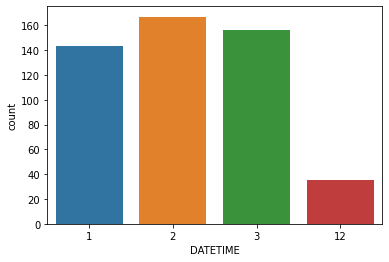

In [29]:
january = ct[(ct.index > '2021-01-02 00:00:00') & (ct.index < '2021-01-30 05:00:00')]
fabruary = ct[(ct.index > '2021-02-02 00:00:00') & (ct.index < '2021-02-28 05:00:00')]
march = ct[(ct.index > '2021-03-02 00:00:00') & (ct.index < '2021-03-27 05:00:00')]
sns.countplot(x= ct.index.month , data = ct )

Text(0, 0.5, 'People Entries')

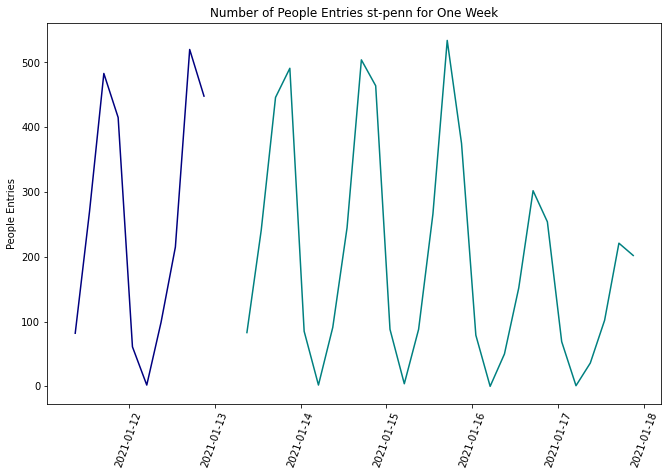

In [30]:
plt.figure(figsize=(11,7))


plt.xticks(rotation=70)
plt.plot(we2, color = 'navy')
plt.plot(wd2, color = '#008080')
plt.title('Number of People Entries st-penn for One Week')
plt.ylabel('People Entries')